# T2 Time series

## Time series with elapsed time relative to start time 

Experimental data has been recorded and saved as numpy array in a file. We will load the file and extract information about the data by displaying it and calculating various statistics. 

In order to complete the below excercies, you need to download the files `time-series1N.npy` and `time-series2.xlsx` from the github repository. Both are located in the `tutorials` folder. Note that both files need to be saved in the same folder as this notebook. 

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
Advanced assignements are for fast-progressing students only. You can work on them if the pace of the class is too slow for you. Note that they will not be discussed in class. You can see the solution in the completed tutorial file uploaded after the class.
</div>

#### Load data 
First, we will load the data using the numpy `load` function which can be used to open files with the `.npy` ending. 

In [1]:
# first we load the numpy module 
import numpy as np

# data will be loaded from the file named 'time-series1N.npy' and saved in the data variable
data = np.load('time-series1N.npy') 

#### Get a first idea about the data

We don't know at all what the data is about. Let's try to get a first idea about what is contained in the varialbe `data`. 

- What is the type of the imported data? 
- What are the dimensions of the data? 
- Which data is contained in each dimension? What do you think? 
- Try to plot the data in a meaningful way.

<class 'numpy.ndarray'>
(2, 1000)
[[ 0.          0.00033     0.00066    ...  0.32901     0.32934
   0.32967   ]
 [-0.0651367  -0.05897409 -0.06522638 ... -0.07132779 -0.07209164
  -0.07201342]]


Text(0, 0.5, 'potential (mV)')

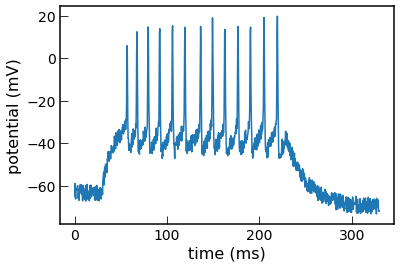

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

print(type(data))
print(np.shape(data))
print(data)

plt.plot(data[0]*1000,data[1]*1000)
plt.xlabel('time (ms)',size=16)
plt.ylabel('potential (mV)',size=16)

**Answer :** The data contains time (in seconds) in the first row and numerical values (in this case the transmembrane voltage of a neuron in V) in the second row. 

#### Extract simple statistics from the data

We move on to get more detailed information about the data. Use `numpy` functions for the below stats. 

- Cacluate the ***maximum***, ***minimum***, ***mean*** and ***standard deviation*** of the data. 

In [3]:
print('maxiumum is : ',np.max(data[1]))
print('minimum is : ',np.min(data[1]))
print('mean is : ',np.mean(data[1]))
print('standard deviation is : ',np.std(data[1]))

maxiumum is :  0.019656807015095406
minimum is :  -0.07328317087327178
mean is :  -0.046218862854862604
standard deviation is :  0.01768147100116899


#### Get information about the time axis

The first row of the data contains the relative time elapsed during the experiment. Let's extract more information about the time axis.

- What is the interval between data points? 
- Are all intervals equal? What is the sampling frequency of the data? 

In [4]:
intervals = np.diff(data[0]) # calculates the difference between each consecutive data points

#print(intervals)

print('The interval between consecutive data points is ', intervals[0],' s.')
print('The sampling frequency of the data is',1./intervals[0], 'Hz.')

The interval between consecutive data points is  0.00033000000000000005  s.
The sampling frequency of the data is 3030.30303030303 Hz.


<div class="alert alert-info">
<em>Advanced assignment :</em>
    
Check more carefully whether all time intervals are equal by plotting the histogram of all intervals using the matplotlib `hist()` function. Another way to test would be the numpy `unique()` function. Check online how to use it (use the `return_counts=True` input argument).     
What do you see? Why? 
</div>

Text(0.5, 0, 'interval (s)')

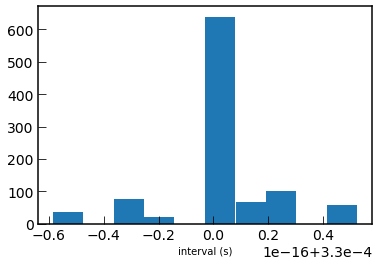

In [8]:
plt.hist(intervals)
plt.xlabel('interval (s)')

In [6]:
u, c = np.unique(intervals, return_counts=True)
print(u)
print(c)

[0.00033 0.00033 0.00033 0.00033 0.00033 0.00033 0.00033 0.00033 0.00033
 0.00033 0.00033 0.00033 0.00033 0.00033 0.00033 0.00033 0.00033]
[ 35  78  20 529   9   6   7   2   1   1  41   1   2  40  68 100  59]


Not all intervals are numerically equal. There are small (on the order of 1E-16) differences between the intervals due to rouning errors. There are numerical inaccuracies when working with floating point numbers. 

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
Perform the `np.diff()` operation on the data (and not the time) and plot it as a function of time. What does this quantity correspond to mathematically? 
</div>

Text(0, 0.5, 'derivative (V/s)')

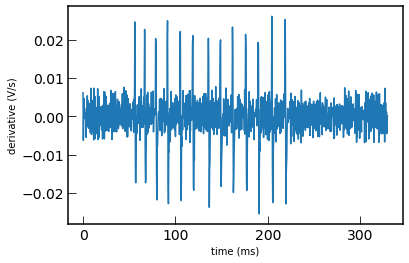

In [10]:
plt.plot(data[0][:-1]*1000,np.diff(data[1]))
plt.xlabel('time (ms)')
plt.ylabel('derivative (V/s)')

We are looking at the derivative of the data, that is dx/dt. It corresponds to the changing slope of the data over time. 

#### Plot histogram of the data 

Let's learn about the distribution of the recorded data by using the histogram function (`hist`) from `matplotlib.pyplot`. 

- Plot the histogram of the data using different bin sizes. 
- What can you say about the distribution of the data (e.g. unimodal, bimodal, skewed, ...)? 
- Calculate the ***median*** as well as the following percentils: ***5th, 25th, 50th, 75th and 95th***. 

(array([32., 29., 40., 73., 48., 46., 39., 20., 15.,  7., 14.,  8., 13.,
        10., 23., 48., 79., 89., 75., 71., 59., 48., 27., 17.,  4.,  4.,
         2.,  4.,  4.,  1.,  3.,  0.,  3.,  4.,  0.,  4.,  2.,  3.,  2.,
         3.,  1.,  2.,  3.,  2.,  1.,  3.,  6.,  6.,  0.,  3.]),
 array([-0.07328317, -0.07142437, -0.06956557, -0.06770677, -0.06584797,
        -0.06398917, -0.06213037, -0.06027157, -0.05841277, -0.05655397,
        -0.05469518, -0.05283638, -0.05097758, -0.04911878, -0.04725998,
        -0.04540118, -0.04354238, -0.04168358, -0.03982478, -0.03796598,
        -0.03610718, -0.03424838, -0.03238958, -0.03053078, -0.02867198,
        -0.02681318, -0.02495438, -0.02309558, -0.02123678, -0.01937798,
        -0.01751918, -0.01566038, -0.01380159, -0.01194279, -0.01008399,
        -0.00822519, -0.00636639, -0.00450759, -0.00264879, -0.00078999,
         0.00106881,  0.00292761,  0.00478641,  0.00664521,  0.00850401,
         0.01036281,  0.01222161,  0.01408041,  0.01593921,

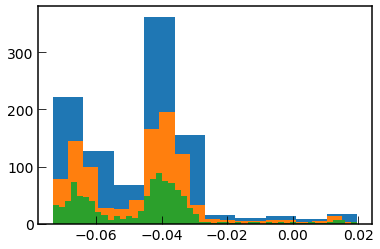

In [19]:
plt.hist(data[1],bins=10)
plt.hist(data[1],bins=20)
plt.hist(data[1],bins=50)

In [20]:
print('median : ',np.median(data[1]))
print('5th percentile : ',np.percentile(data[1],5))
print('25th percentile : ',np.percentile(data[1],25))
print('50th percentile : ',np.percentile(data[1],50))
print('75th percentile : ',np.percentile(data[1],75))
print('95th percentile : ',np.percentile(data[1],95))

median :  -0.042644349892415154
5th percentile :  -0.07029972581711653
25th percentile :  -0.06292238883609147
50th percentile :  -0.042644349892415154
75th percentile :  -0.036941700617553634
95th percentile :  -0.016588102236034987


The distribution is skewed and bimodal. There exist rare events creating a tail of the distribution (skewed). The membrane potential resides most of the time at ~ -70 mV and ~ 40 mV, creating two peaks (bimodal) in the histogram. 

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
Try to implement the computation of the individual percentils in a loop. The percentile for one value is compute at each iteration of the loop. 
</div>

In [19]:
percentiles = [5, 25, 50, 75, 95]
for i in range(len(percentiles)):
    print('%sth percentile : %s' %(percentiles[i],np.percentile(data[1],percentiles[i])))

5th percentile : -0.07029972581711653
25th percentile : -0.06292238883609147
50th percentile : -0.042644349892415154
75th percentile : -0.036941700617553634
95th percentile : -0.016588102236034987


## Time series with time stamps - using pandas

I leave this section for your information and reference in this tutorial, even though we didn't discuss the section below in class. It shows how to used the `pandas` library. This section is left of self-study. Note that `pandas` will **not** be a part later in class. However, `pandas` is a powerful package to use withe time-series and the section below gives you some first notions on how to use it. 

`pandas` provides operations for maniuplating time series in a very efficient way. Let's explore a time series using some of the functions provided by `pandas`.  

Note that you need the `time-series2.xlsx` file from the github repository to complete the below exercises.  The file has to be located in the same directory as this notebook.

#### Load data 
First we will load the data saved in an excel file using the pandas `read_excel` function.

In [8]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

data2 = pd.read_excel('time-series2.xls',sheet_name='NZRainfall',index_col='DATE') # load excel spreadsheet
data2.index = pd.to_datetime(data2.index) # convert the index column to the date format

The data format in which pandas keeps the data is call `DataFrame`. 

#### Get an idea about the data

We already have an idea from the sheetname what the data is about. Let's find out more about the data. 

- How does that data look like? What information are contained in the data? 
- What is the interval/sampling frequency of the data? 
- What are the dimensions of the `DataFrame`? 
- Get the statistics of the data by using the pandas `[name of the DataFrame].describe()` function. 

**Hint :** You can simply display the `DataFrame` to the screen, or see the first lines with `data2.head()`. 

In [3]:
print(data2)
print(data2.head())
print(data2.describe())

            Auckland  Christchurch  Wellington
DATE                                          
2000-01-01     115.4          47.2        91.8
2000-02-01       8.4          25.2        35.2
2000-03-01      57.2          60.8        53.4
2000-04-01     106.8          58.2       109.8
2000-05-01     128.2          62.0        78.2
...              ...           ...         ...
2012-06-01      88.0         111.2       101.4
2012-07-01     141.2          92.1        78.8
2012-08-01     132.8          93.2       108.0
2012-09-01     107.6          32.4        46.2
2012-10-01      69.2          55.0        45.6

[154 rows x 3 columns]
            Auckland  Christchurch  Wellington
DATE                                          
2000-01-01     115.4          47.2        91.8
2000-02-01       8.4          25.2        35.2
2000-03-01      57.2          60.8        53.4
2000-04-01     106.8          58.2       109.8
2000-05-01     128.2          62.0        78.2
         Auckland  Christchurch  Wel

The table is 2D array (3 column and 154 rows/entries) of time stamps and rainfall numbers of three towns - Auckland, Christchurch, Wellington - in New Zealand. The rainfall is measured monthly (interval is 1 month) and given for the period from Jan 2000 through Dec 2012. 

### Plotting and slicing the data 

`pandas` has a build-in plot function which is called by `[name of the DataFrame].plot()`. 

- Plot the entire data.
- Plot the data for the year 2004.
- Plot the data in from the year 2006 through 2011. 

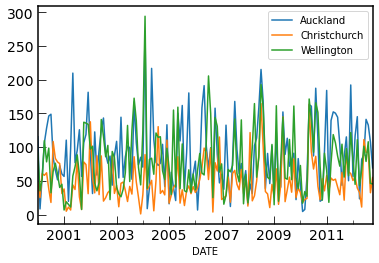

In [4]:
data2.plot()

/tmp/ipykernel_420687/639937513.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data2['2004'].plot()


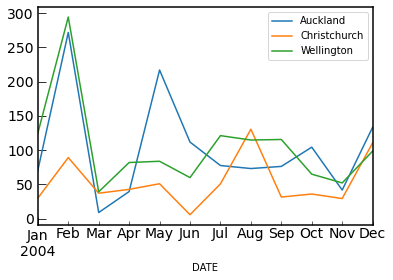

In [5]:
data2['2004'].plot()

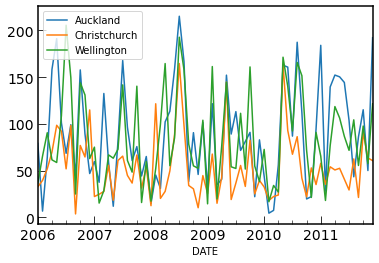

In [7]:
data2['2006':'2011'].plot()

### Resample the data

Let's leverage the build-in function to resample the time series data in pandas. Pandas allows to reample data with the `[name of DataFrame].resample()` function. 

- Get information on the input arguments of the `resample` function online. 
- Downsample the data to 6 month periods and 1 year periods (using the mean of the original data) and plot the data in each case.  

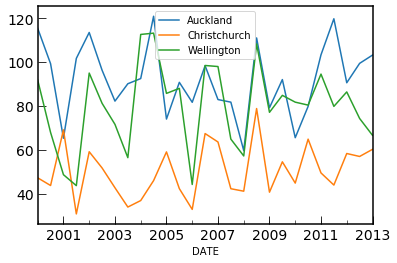

In [26]:
data2b = data2.resample('6m').mean()
data2b.plot()

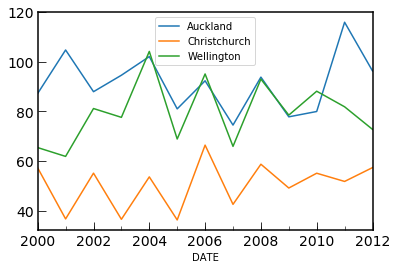

In [27]:
data2b = data2.resample('y').mean()
data2b.plot()

## The end